<div class="alert alert-block alert-warning">
<h1><center><b>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</b></h1></center>
<h1><center><b>Final Project</b></h1></center>
</div>

<div class="alert alert-block alert-info">
<b>Group_ID: 9<b>
<br></br>
<b>Group Members:</b>  

1. Abhinav Acharya B00929073 
2. Arihant B00917961 
3. Mudra B00932103
4. Dhruv B00891974
</div>


<div class="alert alert-block alert-warning">

<h1><center><b>1. Dataset Information </b></h1>

<div class="alert alert-block alert-info">
<b>Dataset Name:</b>  spotify_data.csv

<b>Link to the Dataset:</b> https://www.kaggle.com/datasets/abhinav1331/spotify-dataset/data?select=spotify_data.csv

<b>Dataset Description:</b> 
This is a dataset with of 250 anonymous Spotify users, each with around 100 songs. The total number of rows in this dataset is 28469. Each song's features such as danceability, valence, key, energy, etc. are extracted from Spotify API. This dataset was created for applying recommender models using collaborative and content-based filtering. The goal was to match similar users for a user using collaborative and content-based filtering models. Dataset inspired and extended from - https://www.kaggle.com/datasets/andrewmvd/spotify-playlists?select=spotify_dataset.csv

The source dataset had 4 columns: user_id, artistname, trackname, and playlistname with a shape of (12902976 x 4). Since the data is vague, it cannot be used in recommendation as is. It is also huge to handle which adds additional computational complexities. To transform the data, we randomly chose 250 users who had more than 200 songs. From the random 250 user subset, using Spotify API, we extracted song features such as danceability, valence, energy, etc., for 100 songs of each user aiming for a 25000 row dataset. Since we used threading to speed the process up, it overshooted to 28469 which is still good, as more data means more relevant recommendations in recommendation algorithm domain.

The transformed new dataset is spotify_data.csv which was then uploaded to kaggle. Here is a detailed information about all of it's important columns:
- **user_id:** This is the unique identifier for each user.
- **artistname:** This is the name of the artist of the song.
- **trackname:** This is the name of the song.
- **playlistname:** This is the name of the playlist that the song belongs to.
- **song_id:** This is the unique identifier for each song.
- **danceability:** This is a measure of how suitable a song is for dancing based on a combination of musical elements.
- **energy:** This is a measure of intensity and activity, typically perceived as fast, loud, and noisy.
- **key:** This is the key the track is in.
- **loudness:** This is the overall loudness of a track in decibels (dB).
- **mode:** This indicates the modality (major or minor) of a track.
- **speechiness:** This detects the presence of spoken words in a track.
- **acousticness:** This is a confidence measure of whether the track is acoustic.
- **instrumentalness:** This predicts whether a track contains no vocals.
- **liveness:** This detects the presence of an audience in the recording.
- **valence:** This is a measure of musical positiveness conveyed by a track.
- **tempo:** This is the overall estimated tempo of a track in beats per minute (BPM).
- **type:** This could be the type of the track.
- **duration_ms:** This is the duration of the track in milliseconds.
- **time_signature:** This is an estimated overall time signature of a track.
- **analysis_url:** This could be the URL to access more detailed information about the track.
- **uri:** This is the Spotify URI for the track.
- **id:** This could be another unique identifier for the track or the user.

</div>

<div class="alert alert-block alert-warning">

<h1><center><b>2. Task Information</b></h1>


<div class="alert alert-block alert-info">
<b> Task Goal:</b>  Similar User Matching
 
<b> Task Description:</b> In this task, we aim to develop a recommendation system for users based on their music preferences using the data from **spotify_data.csv**. The recommendation models we will be using are collaborative filtering and content-based filtering.

- **Collaborative Filtering:** This method finds potential user matches based on the items that they have previously liked. The underlying assumption is that if two users have agreed in the past (i.e., they have liked similar items), they will likely agree in the future. The system identifies users who have similar preferences and recommends items that one user has liked but the other has not yet interacted with. This method can be further divided into two subtypes: user-user collaborative filtering and item-item collaborative filtering.

- **Content-Based Filtering:** This method matches users based on the features of the items that each user has liked previously. The assumption here is that a user will like items that are similar to those they have liked in the past. The system uses the features of items to calculate the similarity between different items and recommends items that are most similar to the items the user has liked.

The goal is to provide each user with a list of potential user matches who share similar music preferences. These recommendations can help users discover new music and enhance their listening experience on the platform. The effectiveness of the recommendation system will be evaluated based on metrics such as precision, recall, and F1 score.

This task involves various steps including data preprocessing, model training, recommendation generation, and performance evaluation. It requires a good understanding of both the data and the recommendation algorithms, as well as the ability to interpret and apply the evaluation metrics effectively.

In conclusion, this task presents an exciting opportunity to apply machine learning techniques to enhance user experience and engagement on the platform.

</div>

<div class="alert alert-block alert-warning">

<h1><center><b>3. Task Implementation: Coding</b></h1>

<div class="alert alert-block alert-warning">

<h3><center><b>SIMILAR USER MATCHING USING COLLABORATIVE AND CONTENT-BASED FILTERING</b></h3>

<div class="alert alert-block alert-info">
Importing Libraries</div>

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


<div class="alert alert-block alert-info">
Loading the dataset</div>

In [3]:
spotify_dataset_path = r'spotify_data.csv'

spotify_dataset = pd.read_csv(spotify_dataset_path)

<div class="alert alert-block alert-info">

<h5><b>3.1 EDA</b></h5>

</div>

<div class="alert alert-block alert-info">

Descriptive Analysis

</div>

In [4]:
print("EDA:")
print('\nSpotify Data:')
display(spotify_dataset.head())
print("Length of spotify dataset:", len(spotify_dataset))
display(spotify_dataset.describe())
display(spotify_dataset.isna().sum())
display(pd.DataFrame({'Column': spotify_dataset.columns, 'DType': [spotify_dataset[col].dtype for col in spotify_dataset.columns], 'NUniques': [spotify_dataset[col].nunique() for col in spotify_dataset.columns]}))

EDA:

Spotify Data:


,user_id,artistname,trackname,playlistname,song_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,analysis_url,uri,id
0,c1a6910ecac9fd5e5348326675fb6ca6,Jon Hopkins,Abandon Window,CHILL,5BKp7nLEzAtazOxYla2sBr,0.063,0.1730,6.0,-26.199,1.0,...,0.836000,0.0863,0.1120,68.963,audio_features,297493.0,3.0,https://api.spotify.com/v1/audio-analysis/5BKp...,spotify:track:5BKp7nLEzAtazOxYla2sBr,5BKp7nLEzAtazOxYla2sBr
1,c1a6910ecac9fd5e5348326675fb6ca6,Grouper,Clearing,CHILL,3IL43TRkEnh4buGOZ1Brb5,0.230,0.0432,6.0,-23.066,1.0,...,0.932000,0.1050,0.1360,89.582,audio_features,281680.0,4.0,https://api.spotify.com/v1/audio-analysis/3IL4...,spotify:track:3IL43TRkEnh4buGOZ1Brb5,3IL43TRkEnh4buGOZ1Brb5
2,c1a6910ecac9fd5e5348326675fb6ca6,Com Truise,Closed,CHILL,1z2iz13gYpqnH4IwUQsSLx,0.623,0.5200,2.0,-7.926,1.0,...,0.839000,0.0899,0.1720,172.051,audio_features,184000.0,4.0,https://api.spotify.com/v1/audio-analysis/1z2i...,spotify:track:1z2iz13gYpqnH4IwUQsSLx,1z2iz13gYpqnH4IwUQsSLx
3,c1a6910ecac9fd5e5348326675fb6ca6,Radiohead,Codex,CHILL,6ttYF5VadzTssGV2i1Q08T,0.346,0.1280,2.0,-17.536,0.0,...,0.760000,0.1300,0.0654,58.996,audio_features,287067.0,4.0,https://api.spotify.com/v1/audio-analysis/6ttY...,spotify:track:6ttYF5VadzTssGV2i1Q08T,6ttYF5VadzTssGV2i1Q08T
4,c1a6910ecac9fd5e5348326675fb6ca6,Nina Simone,Cotton Eyed Joe,CHILL,3d5Mw0esNjnh123xyy48IF,0.421,0.0820,0.0,-18.893,1.0,...,0.000209,0.1280,0.2040,72.529,audio_features,171280.0,4.0,https://api.spotify.com/v1/audio-analysis/3d5M...,spotify:track:3d5Mw0esNjnh123xyy48IF,3d5Mw0esNjnh123xyy48IF


Length of spotify dataset: 28469


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,28469.000000,28469.000000,28469.000000,28469.000000,28469.000000,28469.000000,28469.000000,28469.000000,28469.000000,28469.000000,28469.00000,2.846900e+04,28469.00000
mean,0.546875,0.641947,5.186132,-8.442115,0.655836,0.076269,0.266104,0.150150,0.202869,0.480868,121.76861,2.438535e+05,3.89824
std,0.172200,0.247924,3.570595,4.843543,0.475103,0.098086,0.320394,0.294507,0.180680,0.254482,28.67606,9.741088e+04,0.43739
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.329000e+03,0.00000
25%,0.432000,0.481000,2.000000,-10.119000,0.000000,0.033900,0.010300,0.000000,0.095600,0.275000,100.42200,1.960000e+05,4.00000
50%,0.554000,0.693000,5.000000,-7.226000,1.000000,0.044100,0.101000,0.000271,0.127000,0.473000,120.85000,2.317730e+05,4.00000
75%,0.671000,0.845000,8.000000,-5.293000,1.000000,0.071900,0.464000,0.075700,0.258000,0.684000,138.70400,2.737330e+05,4.00000
max,0.988000,0.999000,11.000000,2.017000,1.000000,0.961000,0.996000,1.000000,0.999000,0.993000,238.89500,4.057195e+06,5.00000


user_id             0
artistname          0
trackname           0
playlistname        0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
duration_ms         0
time_signature      0
analysis_url        0
uri                 0
id                  0
dtype: int64

,Column,DType,NUniques
0,user_id,object,250
1,artistname,object,6185
2,trackname,object,21454
3,playlistname,object,1078
4,song_id,object,22179
5,danceability,float64,920
6,energy,float64,1415
7,key,float64,12
8,loudness,float64,11099
9,mode,float64,2



<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.2 Pre-processing</b></h5>

</div>

<div class="alert alert-block alert-info">

Feature selection & encoding

</div>

- user_id: The unique identifier of the user who listened to the song.

- artistname: The name of the artist who performed the song.

- trackname: The name of the song.

- playlistname: The name of the playlist in which the song is included.

- song_id: The unique identifier of the song in Spotify.

- danceability: A measure of how suitable a song is for dancing based on tempo, rhythm, and beat strength.

- energy: A measure of how intense and active a song is based on dynamic range, loudness, and timbre. 

- key: The estimated overall key of the song based on the pitch class notation.

- loudness: The overall loudness of a song in decibels (dB).

- mode: The modality (major or minor) of a song based on the pitch class notation. This is a float type column with 2 unique values: 0.0 for minor and 1.0 for major.

- speechiness: A measure of how much spoken words are present in a song. 

- acousticness: A measure of how acoustic a song is based on the presence of acoustic sounds. 

- instrumentalness: A measure of how instrumental a song is based on the absence of vocal sounds. 

- liveness: A measure of how live a song is based on the presence of audience sounds. 

- valence: A measure of how positive or negative a song is based on the musical mood. 

- tempo: The overall tempo of a song in beats per minute (BPM). 

- type: The type of the Spotify object. For this dataset, it should be ‘audio_features’.

- duration_ms: The duration of a song in milliseconds. 

- time_signature: The estimated number of beats in each bar of a song.

- analysis_url: The URL to access the detailed audio analysis of a song provided by Spotify.

- uri: The Spotify URI (Uniform Resource Identifier) of a song. 

- id: The Spotify ID of a song.

We wont be needing `type`, `analysis_url`, `uri`, `id`, `song_id` for any of the visual analysis or model training tasks. We can drop them.

In [5]:
columns_to_drop =['analysis_url', 'type', 'uri', 'id', 'song_id']

spotify_dataset.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(spotify_dataset.shape)


(28469, 17)


`user_id` and `artistname` could be used in training the models or data analysis or visualization as:

- Songs of an artist might have same features in common,
- User might have similar taste and is more likely to choose a song with similar metrics on basic intuition.

So we convert these textual columns into numerical ones.

In [6]:
def mapper(col):
    coded_dict = dict()
    cter = 1
    encoded = []
    
    for val in spotify_dataset[col]:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter += 1
        
        encoded.append(coded_dict[val])
    return encoded

artist_id = mapper('artistname')
user_ids = mapper('user_id')


spotify_dataset['artistname_encoded'] = artist_id
spotify_dataset['user_id_encoded'] = user_ids

spotify_dataset.head()

,user_id,artistname,trackname,playlistname,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artistname_encoded,user_id_encoded
0,c1a6910ecac9fd5e5348326675fb6ca6,Jon Hopkins,Abandon Window,CHILL,0.063,0.1730,6.0,-26.199,1.0,0.0530,0.80400,0.836000,0.0863,0.1120,68.963,297493.0,3.0,1,1
1,c1a6910ecac9fd5e5348326675fb6ca6,Grouper,Clearing,CHILL,0.230,0.0432,6.0,-23.066,1.0,0.0420,0.99100,0.932000,0.1050,0.1360,89.582,281680.0,4.0,2,1
2,c1a6910ecac9fd5e5348326675fb6ca6,Com Truise,Closed,CHILL,0.623,0.5200,2.0,-7.926,1.0,0.0556,0.00478,0.839000,0.0899,0.1720,172.051,184000.0,4.0,3,1
3,c1a6910ecac9fd5e5348326675fb6ca6,Radiohead,Codex,CHILL,0.346,0.1280,2.0,-17.536,0.0,0.0303,0.84100,0.760000,0.1300,0.0654,58.996,287067.0,4.0,4,1
4,c1a6910ecac9fd5e5348326675fb6ca6,Nina Simone,Cotton Eyed Joe,CHILL,0.421,0.0820,0.0,-18.893,1.0,0.0441,0.95600,0.000209,0.1280,0.2040,72.529,171280.0,4.0,5,1


<div class="alert alert-block alert-info">

Visualizing spread and distribution

</div>

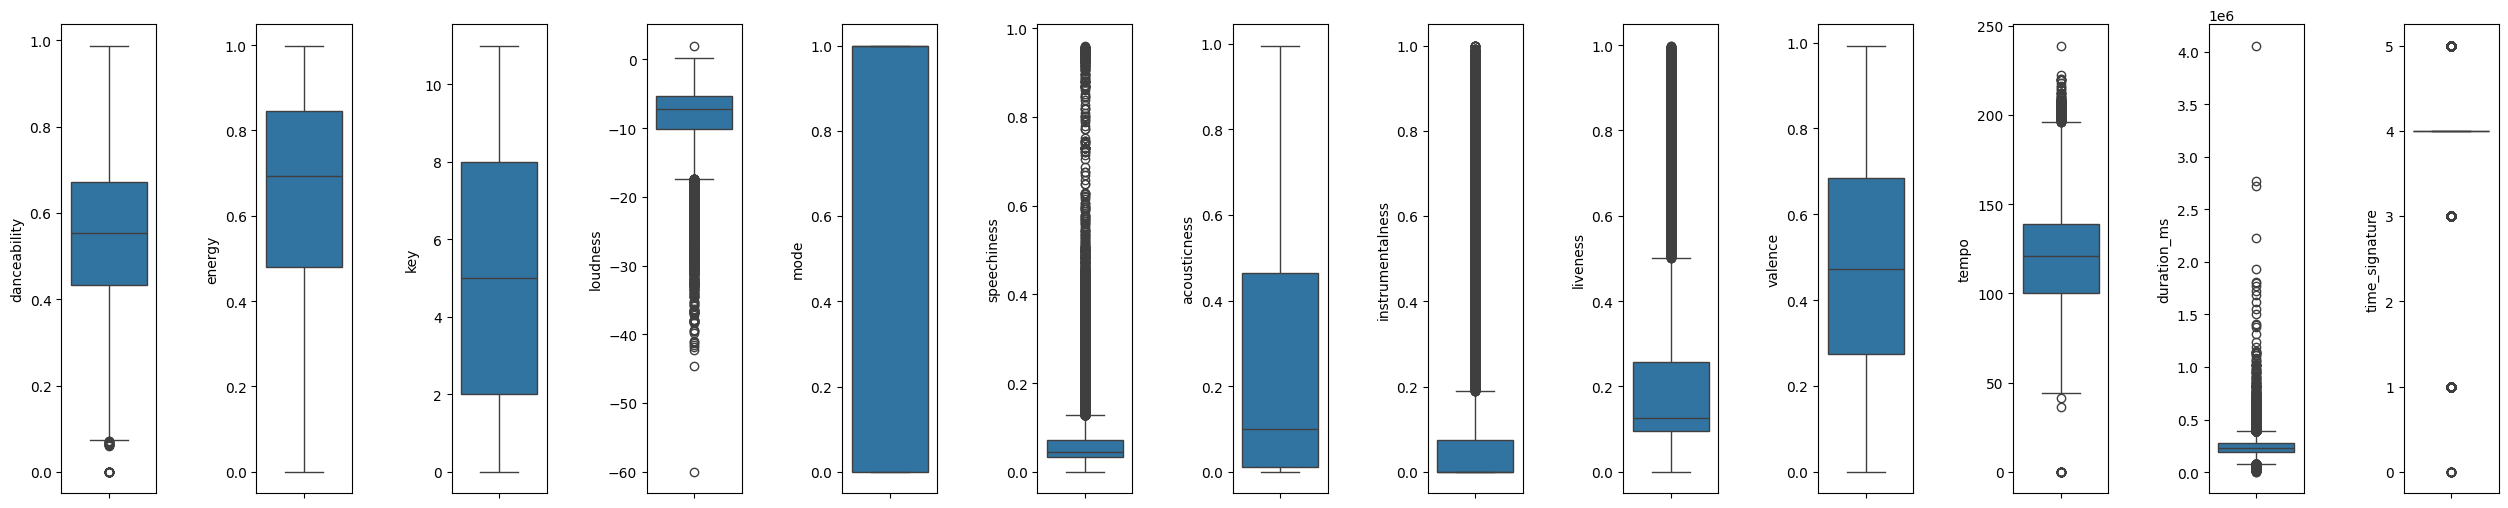

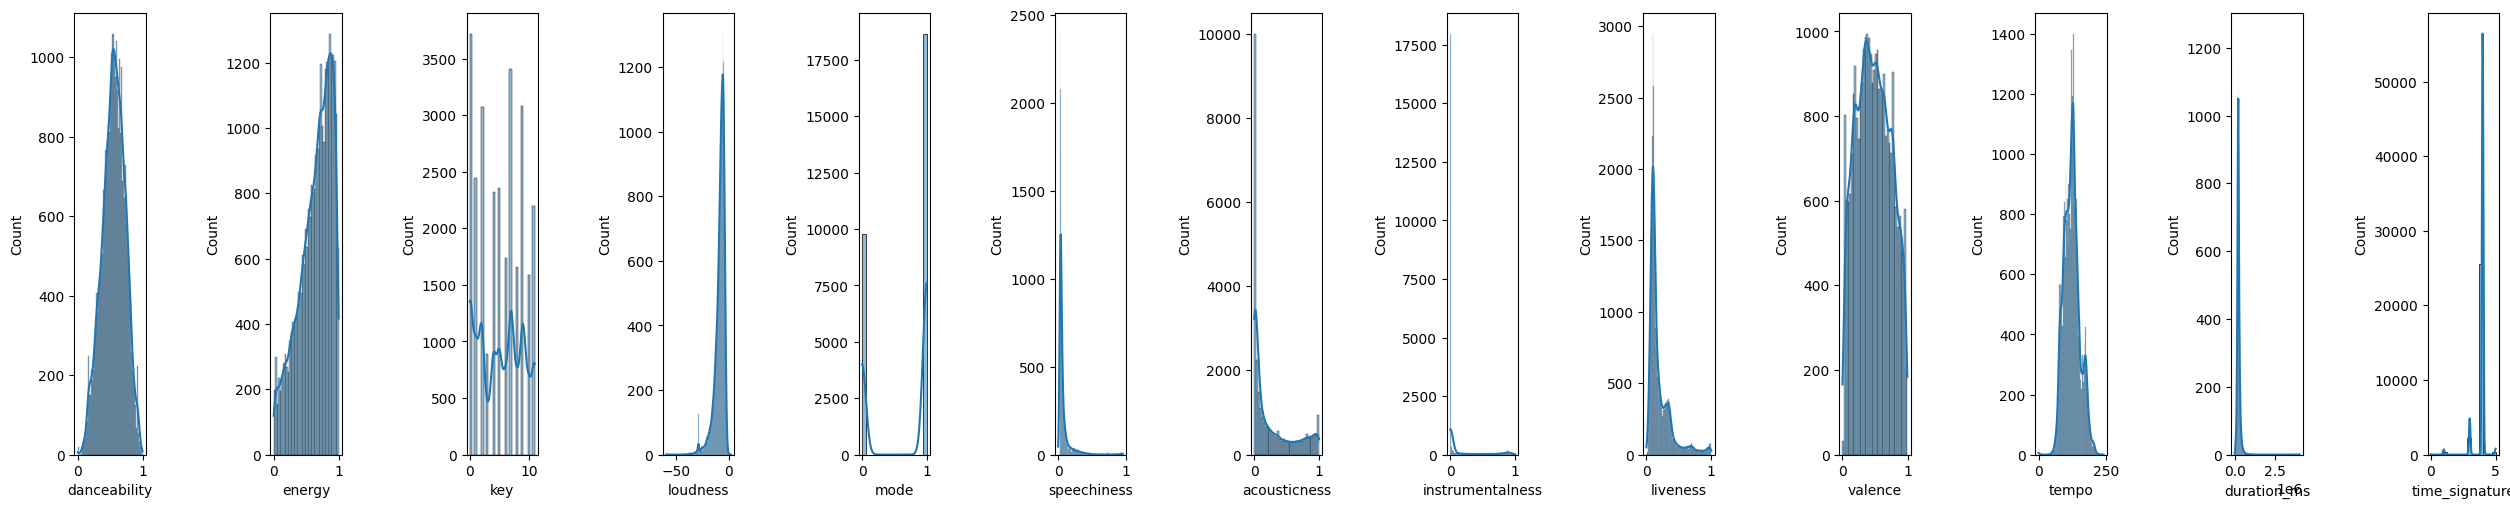

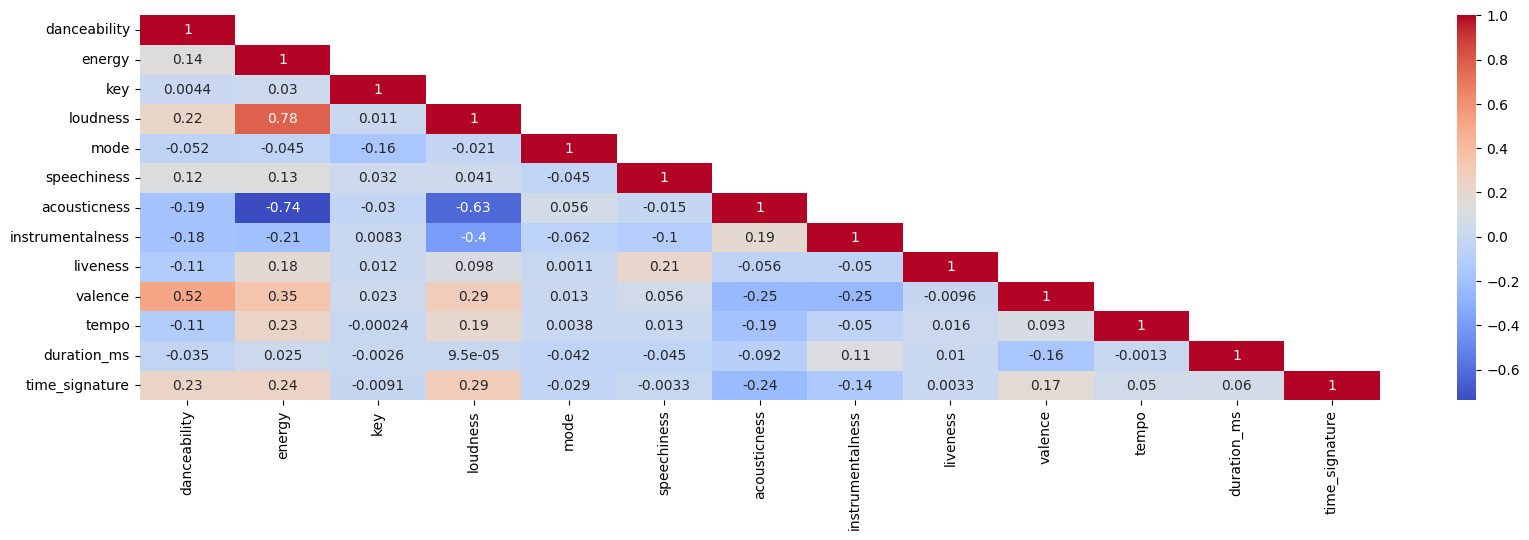

In [7]:
# Spotify Dataset

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

def boxplot(data, columns):
    plt.figure(figsize=(25,5))
    for i, col in enumerate(columns):
        plt.subplot(1,len(columns),i+1)
        sns.boxplot(data[col])
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=5)
    plt.show()

def histplot(data, columns):
    plt.figure(figsize=(25,5))
    for i, col in enumerate(columns):
        plt.subplot(1,len(columns),i+1)
        sns.histplot(data, x=col, kde=True)
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=5)
    plt.show()

def corrmap(data, columns):
    corr = data[columns].corr()
    fig = plt.figure(figsize=(20,5))
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask)
    plt.show()

boxplot(spotify_dataset, columns)
histplot(spotify_dataset, columns)
corrmap(spotify_dataset, columns)

<div class="alert alert-block alert-success">

The decision to not handle or transform the abnormalities in the dataset, such as outliers and correlations, is a valid approach in certain scenarios, especially in the context of recommendation systems. Here’s a more detailed explanation:

- **Preserving Originality:** Outliers in a dataset often carry significant information. In the context of songs, these outliers could represent unique characteristics that set a song apart. Handling these outliers could distort these unique features, thereby affecting the originality of the song.

- **Maintaining Information Integrity:** High correlation between columns in a dataset usually indicates redundancy. However, in the case of recommendation systems, even highly correlated features can provide valuable insights. Removing these columns could lead to loss of crucial information, which could negatively impact the quality of the recommendations.

- **Importance of Abnormalities:** The so-called “abnormalities” in the dataset might actually represent important patterns or trends. For instance, a group of songs that are outliers in terms of a certain feature might actually be a specific genre or style of music. Similarly, correlated features might indicate a common trend in music preferences.

- **Context-Specific Decisions:** The decision to handle or ignore these abnormalities is highly dependent on the specific use case. In machine learning, there’s no one-size-fits-all approach. The best strategy is often determined by the nature of the data and the specific requirements of the project.

- **Visualizations for Insight, Not Action:** Visualizations are a powerful tool for understanding the structure and patterns in the data. However, not all observations from visualizations necessitate action. In this case, the visualizations serve to highlight the characteristics of the dataset, but do not necessarily imply a need for data transformation or cleaning.

In conclusion, the choice to preserve the dataset in its original form, despite the observed abnormalities, is a strategic decision that prioritizes information preservation and the integrity of the recommendation system. This approach is indeed common in the field of machine learning, particularly in scenarios where the cost of information loss outweighs the potential benefits of data cleaning or transformation.
</div>



<div class="alert alert-block alert-info">

Data Transformation

</div>

In [8]:
def normalize(numerical_columns, df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])
    # df = pd.DataFrame(columns=numerical_columns, data=x_scaled)
    return df

In [9]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
spotify_dataset = normalize(columns, spotify_dataset)

<div class="alert alert-block alert-info">

<h5><b>3.3 Model Development & Training</b></h5>

</div>

<div class="alert alert-block alert-danger"> 

**Collaborative Filtering based on artist**

</div>

To match users based on their interests in artists. Collaborative filtering says that if 2 people like a common artist, they are most likely to like a new artist together, rather than a pair of people with no common liked artist.

In [10]:
def create_user_artist_matrix(data):
    data['interact'] = 1
    user_artist = data.groupby(['user_id_encoded', 'artistname_encoded'])['interact'].max().unstack().fillna(0).astype('int')
    return user_artist

def generate_recommendations_collaborative(user_id, user_artist, threshold):
    # compute similarity of each user to the provided user
    similarity_users = np.dot(user_artist.loc[user_id], user_artist.transpose())
    similarity_users = pd.DataFrame(similarity_users, columns=['similarity'])
    
    # create similar_user_id column
    # Adding 1 because index starts from 0 in pandas
    similarity_users['similar_user_id'] = similarity_users.index + 1
    
    # Find common artists to apply threshold
    common_artists = find_common_artists(user_id, user_artist)
    
    # Apply threshold
    similarity_users = similarity_users[similarity_users['similar_user_id'].isin([user for user, count in common_artists.items() if count >= threshold])]
 
    # calculate the percentage of similarity
    similarity_users['percentage_similarity'] = similarity_users['similar_user_id'].apply(lambda x: jaccard_similarity(user_id, x, user_artist))
    
    # remove the own user's id
    similarity_users = similarity_users[similarity_users['similar_user_id'] != user_id]
    
    # sort by similarity and then by percentage similarity
    similarity_users.sort_values(by=['similarity', 'percentage_similarity'], ascending=False, inplace=True)
    
    # Remove recommendations that have no similarity
    similarity_users = similarity_users[similarity_users['percentage_similarity'] > 0]
    
    # Get the list of similar user ids for evaluating the algorithm
    recommendations = similarity_users['similar_user_id'].tolist()
    
    precision, recall, f1_score = calculate_metrics_collaborative(recommendations, common_artists, threshold=5)
    
    similarity_users = similarity_users.assign(similar_user_id=similarity_users['similar_user_id'].apply(lambda x: spotify_dataset.loc[spotify_dataset['user_id_encoded'] == x, 'user_id'].values[0] if x in spotify_dataset['user_id_encoded'].values else x))
    
    return similarity_users, precision, recall, f1_score


def jaccard_similarity(user1, user2, user_artist):
    # print(user1, user2)
    # Get the artists for each user
    artists_user1 = set(user_artist.loc[user1].to_numpy().nonzero()[0])
    artists_user2 = set(user_artist.loc[user2].to_numpy().nonzero()[0])
    # print(artists_user1)
    
    # Calculate the intersection and union of the artists
    intersection = len(artists_user1.intersection(artists_user2))
    union = len(artists_user1.union(artists_user2))
    
    # Calculate Jaccard Similarity
    similarity = intersection / union if union != 0 else 0
    
    return similarity * 100

def find_common_artists(user_id, user_artist):
    # Find the artists that the target user has interacted with
    target_artists = set(user_artist.loc[user_id][user_artist.loc[user_id]==1].index)

    # Create a dictionary to store each user and their count of common artists with the target user
    common_artists = {}

    # Iterate over each user
    for user in user_artist.index:
        if user != user_id:  # Exclude the target user
            # Find the artists that the current user has interacted with
            user_artists = set(user_artist.loc[user][user_artist.loc[user]==1].index)
            
            # Find the common artists between the target user and the current user
            common = target_artists & user_artists
            
            # Store the count of common artists in the dictionary
            common_artists[user] = len(common)

    return common_artists

def calculate_metrics_collaborative(recommendations, common_artists, threshold):
    # Calculate the number of recommended users
    num_recommended = len(recommendations)

    # Calculate the number of relevant users (i.e., users who have more than 'threshold' artists in common with the target user)
    num_relevant = sum(1 for user, count in common_artists.items() if count >= threshold)

    # Calculate the number of true positives (i.e., relevant users who were also recommended)
    num_true_positives = sum(1 for user in recommendations if common_artists[user] >= threshold)

    # Precision is the proportion of recommended users that are relevant
    precision = num_true_positives / num_recommended if num_recommended else 0

    # Recall is the proportion of relevant users that are recommended
    recall = num_true_positives / num_relevant if num_relevant else 0

    # F1 score is the harmonic mean of precision and recall
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    return precision, recall, f1_score

# Exhaustive search for the optimal value of threshold
def calculate_threshold(user_id):
    user_artist = create_user_artist_matrix(spotify_dataset)
    threshold = 0
    user_artist_count = len(user_artist.loc[user_id][user_artist.loc[user_id]==1])
    for i in range(0, user_artist_count+1):
        user_recommendations, precision, recall, f1_score = generate_recommendations_collaborative(user_id, user_artist, threshold=threshold)
        if len(user_recommendations) == 0:
            return threshold
        threshold+=1
        
user_artist = create_user_artist_matrix(spotify_dataset)
user_id = 100

# Defines the number of artists that both users need to have in common to consider the match relevant (True Positive)
threshold = 7
user_recommendations, collaborative_precision, collaborative_recall, collaborative_f1_score = generate_recommendations_collaborative(user_id=user_id, user_artist=user_artist, threshold=threshold)

# display(user_artist)
print("The 5 most similar users to user_id 100 are: ")
display(user_recommendations.head())

print(f"Precision: {collaborative_precision}")
print(f"Recall: {collaborative_recall}")
print(f"F1 Score: {collaborative_f1_score}")

The 5 most similar users to user_id 100 are: 


,similarity,similar_user_id,percentage_similarity
54,14,4196c501541cf69a35fabbe7eab83fa7,13.207547
76,11,0a2f45139d5669f13c09670564d299ca,9.166667
133,7,228975be1e4296380d17eece902d9ec1,5.691057
122,7,b4bef6915c22aaf74d8b57f952c18a1a,5.555556


Precision: 1.0
Recall: 0.26666666666666666
F1 Score: 0.4210526315789474


<div class="alert alert-block alert-danger"> 

**Content-Based Filtering**

</div>

In [11]:
def generate_recommendations_content_based(user_id, data, threshold):
    # Get user feature values
    feature_values_dict = data[data['user_id_encoded'] == user_id].mean(numeric_only=True)[:-3].to_dict()
    
    # Aggregate data by user
    data_agg = data[feature_values_dict.keys()].groupby(data['user_id_encoded']).mean()
    
    # display(data_agg)
    
    # Adjust the feature values of the target user
    data_agg.loc[user_id] = list(feature_values_dict.values())
    
    # Calculate the cosine similarity between the user and all other users
    similarity_scores = cosine_similarity(data_agg.loc[user_id].values.reshape(1, -1), data_agg.values)[0]
    
    # Create a DataFrame for the similarity scores
    similarity_df = pd.DataFrame(similarity_scores, columns=['similarity'], index=data_agg.index)
    
    similarity_df.reset_index(inplace=True)

    # Remove the user's own id
    similarity_df = similarity_df[similarity_df['user_id_encoded'] != user_id]
    
    # Sort the users by similarity score
    similarity_df.sort_values(by='similarity', ascending=False, inplace=True)
    
    # Calculate percentages of similarity
    similarity_df['similarity_percentage'] = similarity_df['similarity'] * 100
    
    recommended_users = similarity_df['user_id_encoded'].tolist()
    
    # print(len(recommended_users), len(similarity_df))
    
    precision, recall, f1_score = calculate_metrics_content_based(recommended_users, data, feature_values_dict, threshold)
    
    return similarity_df, precision, recall, f1_score

def calculate_metrics_content_based(recommended_users, data, user_features, threshold):
    tp = 0
    fp = 0
    fn = 0
    relevant_users = set(data[data['user_id_encoded'].isin(recommended_users)]['user_id_encoded'])

    for user in recommended_users:
        # Calculate the aggregate of their song features
        similar_user_features = data[data['user_id_encoded'] == user].mean(numeric_only=True)[:-3].to_dict()

        # Compare that to the user_features
        num_similar_features_above_threshold = sum(similar_user_features[feature] >= user_features[feature] for feature in user_features)

        is_relevant = num_similar_features_above_threshold >= threshold

        if is_relevant:
            tp += 1
        else:
            # If user is recommended but not relevant
            if user in relevant_users:
                fp += 1
            else:
                fn += 1

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score


user_id = 100

# Defines the value that is used to compare the absolute difference of both users' features. 
# The difference must be less than the threshold (True Positive)
threshold = 6

# normalize dataset so that all features are in same scale
spotify_dataset = normalize(columns, spotify_dataset)
# display(spotify_dataset.head())

cosine_sim_df, content_based_precision, content_based_recall, content_based_f1_score = generate_recommendations_content_based(user_id=user_id, data=spotify_dataset, threshold=threshold)
display(cosine_sim_df.head(), len(cosine_sim_df))
print(f'Precision: {content_based_precision}')
print(f'Recall: {content_based_recall}')
print(f'F1 Score: {content_based_f1_score}')

,user_id_encoded,similarity,similarity_percentage
0,1,1.0,100.0
94,95,1.0,100.0
14,15,1.0,100.0
113,114,1.0,100.0
17,18,1.0,100.0


249

Precision: 0.8473895582329317
Recall: 1.0
F1 Score: 0.9173913043478261


<div class="alert alert-block alert-info">

<h5><b>3.4 Evaluation</b></h5>

</div>

<div class="alert alert-block alert-danger"> 

**Collaborative Filtering**

</div>

In [12]:
print(f"Precision: {collaborative_precision}")
print(f"Recall: {collaborative_recall}")
print(f"F1 Score: {collaborative_f1_score}")

Precision: 1.0
Recall: 0.26666666666666666
F1 Score: 0.4210526315789474


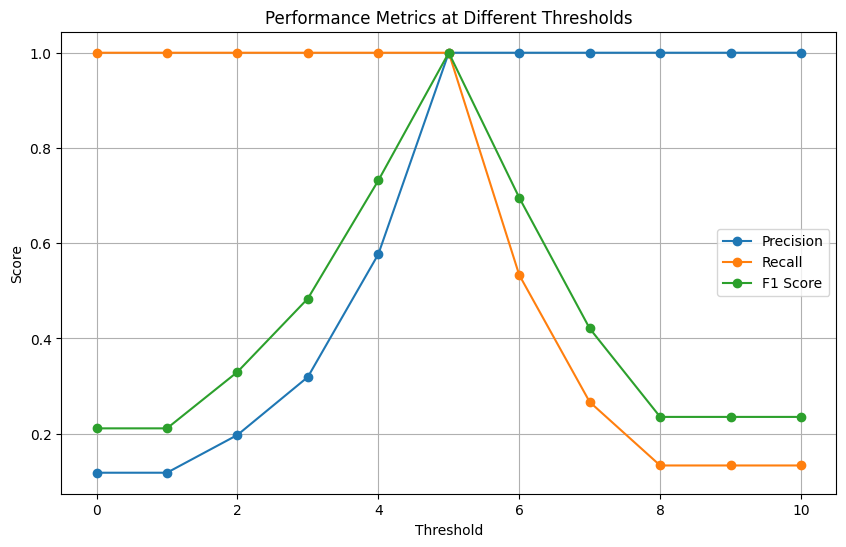

In [13]:
collaborative_precision_list = []
collaborative_recall_list = []
collaborative_f1_score_list = []
for threshold in range(0, 11):
    user_recommendations, collaborative_precision, collaborative_recall, collaborative_f1_score = generate_recommendations_collaborative(user_id=user_id, user_artist=user_artist, threshold=threshold)
    collaborative_precision_list.append(collaborative_precision)
    collaborative_recall_list.append(collaborative_recall)
    collaborative_f1_score_list.append(collaborative_f1_score)

thresholds = range(0, 11, 1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, collaborative_precision_list, marker='o', label='Precision')
plt.plot(thresholds, collaborative_recall_list, marker='o', label='Recall')
plt.plot(thresholds, collaborative_f1_score_list, marker='o', label='F1 Score')
plt.title('Performance Metrics at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger"> 

**Content-Based Filtering**

</div>

In [14]:
print(f'Precision: {content_based_precision}')
print(f'Recall: {content_based_recall}')
print(f'F1 Score: {content_based_f1_score}')

Precision: 0.8473895582329317
Recall: 1.0
F1 Score: 0.9173913043478261


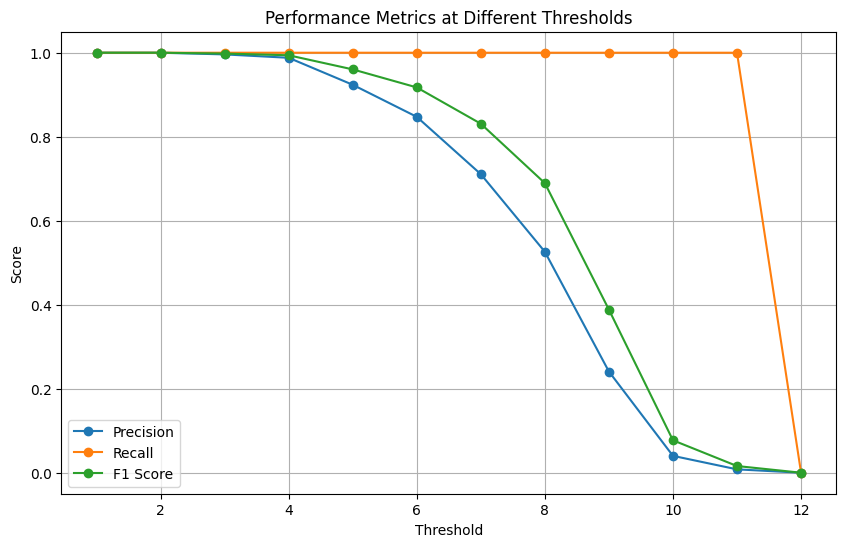

In [15]:
content_based_precision_list = []
content_based_recall_list = []
content_based_f1_score_list = []
for threshold in np.arange(1, 13, 1):
    cosine_sim_df, content_based_precision, content_based_recall, content_based_f1_score = generate_recommendations_content_based(user_id=user_id, data=spotify_dataset, threshold=threshold)
    content_based_precision_list.append(content_based_precision)
    content_based_recall_list.append(content_based_recall)
    content_based_f1_score_list.append(content_based_f1_score)
    
thresholds = np.arange(1, 13, 1)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, content_based_precision_list, marker='o', label='Precision')
plt.plot(thresholds, content_based_recall_list, marker='o', label='Recall')
plt.plot(thresholds, content_based_f1_score_list, marker='o', label='F1 Score')
plt.title('Performance Metrics at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">

<h5><b>3.5 Analysis</b></h5>

</div>

<div class="alert alert-block alert-success">
Relevance in recommendation models is crucial for several reasons:

- **User Satisfaction:** Relevant recommendations can significantly enhance user satisfaction. When users receive recommendations that align with their interests, they are more likely to engage with the platform and have a positive user experience.

- **Personalization:** Relevance is key to personalization. By providing relevant recommendations, the system can cater to the unique tastes and preferences of each user, making the platform more personalized and user-friendly.

- **Efficiency:** Relevant recommendations can help users discover new items they might like without having to search or browse extensively. This makes the platform more efficient and user-friendly.

In the models above, we’ve introduced relevance in the following ways:

- **Collaborative Filtering:** In this model, relevance is determined based on user-user's artist similarity. If two users have liked similar items in the past, they are considered similar, and the items liked by one user are recommended to the other. This ensures that the recommendations are relevant to the user’s past behavior and preferences.

- **Content-Based Filtering:** In this model, relevance is determined based on item features. The system recommends items that are similar to the items the user has liked in the past, ensuring that the recommendations are relevant to the user’s known preferences.

</div>

<div class="alert alert-block alert-success">

The threshold plays a crucial role in recommendation systems, particularly in collaborative filtering and content-based filtering models. Here’s why it’s important and how you’ve implemented it:

- **Importance of Threshold:** The threshold is a parameter that determines the minimum level of similarity required for two users or items to be considered similar. It acts as a filter that controls the quality of the recommendations. A higher threshold means stricter criteria for similarity, leading to more precise but potentially less diverse recommendations. Conversely, a lower threshold may increase the diversity of the recommendations but could also include less relevant items.

- **Implementation in Collaborative Filtering:** In the collaborative filtering model, the threshold refers to the minimum number of items that two users need to have in common for the system to consider them similar. By adjusting this threshold, us can control the trade-off between precision and recall in the recommendations.

- **Implementation in Content-Based Filtering:** In the content-based filtering model, the threshold refers to the minimum number of features that two items need to have in common for the system to consider them similar. This allows us to control the level of specificity in the recommendations

What's novel about this approach is the enhancement it applies on relevance. Though it reduces the diversity, it enhances the relevance of the recommendations resulting in more perfect/ similar user matches which is the end goal of the task. Moreover, changing the value of the threshold as a hyperparameter gives us the control over the recommendations. As compared of traditional black box fixed recommender systems, this let's us play around with the lenience and relevance of the recommendations made. This also aids in enhancing the explainability and the interpretability of the model, as it somewhat removes the opaqueness / complexity. 

</div>

<div class="alert alert-block alert-danger"> 

**Collaborative Filtering**

</div>

<div class="alert alert-block alert-success">
<b>Results:</b> 

<b>Collaborative filtering</b> is a method used to find similar users (or items) and recommend items (or users) based on these similarities.

In the graph above for collaborative filtering, We are plotting the precision, recall, and F1 score at different threshold levels. These metrics are commonly used to evaluate the performance of a recommendation system:

- Precision measures the proportion of recommended items that are relevant.
- Recall measures the proportion of relevant items that are recommended.
- F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both values.

Apart from that, here's a detailed analysis of the collaborative filtering recommendation model:

1. **Threshold Impact:** The graph shows how the performance metrics (precision, recall, and F1 score) change with different thresholds. The threshold here refers to the number of artists that both users need to have in common to consider the match relevant.

2. **Precision and Recall Trade-off:** As the threshold increases, both f1_score and recall decrease. This suggests that as the threshold increases, the system becomes more conservative and precise in its recommendations, but at the cost of recall and F1 score. This is a common trade-off in recommendation systems. A higher threshold means the system is stricter about what it considers a relevant recommendation, which can increase precision but decrease recall. The F1 score, which balances precision and recall, also decreases as the system becomes too conservative.

3. **Optimal Threshold:** From the graph, it seems that the F1 score is highest at a threshold of <b>5</b>. This suggests that a threshold of <b>5</b> results in the best balance between precision and recall, making it the most effective threshold for finding similar users in the collaborative filtering algorithm.

4. **Performance Evaluation:** The **calculate_metrics** function in the code calculates these metrics to evaluate the performance of the recommendation system. It uses the number of true positives (relevant users who were also recommended), the number of recommended users, and the number of relevant users to calculate precision, recall, and F1 score.

5. **Recommendation Generation:** The **generate_recommendations_collaborative** function generates recommendations for a given user based on the similarity between this user and others. It uses the **Jaccard similarity** to measure the similarity and applies the threshold to find the most similar users.
</div>



<div class="alert alert-block alert-danger"> 

**Content-Based Filtering**

</div>

<div class="alert alert-block alert-success">
<b>Results:</b> 

<b>Content-Based Filtering</b> is a method used to recommend items (or users) based on their feature values. The model calculates the cosine similarity between the target user and all other users, and then recommends users who have a high similarity score.

In the graph above for content-based filtering, we are plotting the precision, recall, and F1 score at different threshold levels. These metrics are commonly used to evaluate the performance of a recommendation system:

- Precision measures the proportion of recommended items that are relevant.
- Recall measures the proportion of relevant items that are recommended.
- F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both values.

Apart from that, here's a detailed analysis of the content-based filtering recommendation model:

1. **Threshold Impact:** The graph shows how the performance metrics (precision, recall, and F1 score) change with different thresholds. The threshold here refers to the number of features that both users need to have in common to consider the match relevant.

2. **Precision and F1_score Trade-off:** As the threshold increases, both f1_score and precision decrease. This suggests that as the threshold increases, the system becomes more conservative and less precise in its recommendations, but at the cost of precision and F1 score. This is a common trade-off in recommendation systems. A higher threshold means the system is stricter about what it considers a relevant recommendation, which can decrease precision. The F1 score, which balances precision and recall, also decreases as the system becomes too conservative.

3. **Optimal Threshold:** From the graph, it seems that the F1 score is highest at a threshold of <b>3</b>. This suggests that a threshold of <b>3</b> results in the best balance between precision and recall, making it the most effective threshold for finding similar users in the content-based filtering algorithm.

4. **Performance Evaluation:** The **calculate_metrics_content_based** function in the code calculates these metrics to evaluate the performance of the recommendation system. It uses the number of true positives (relevant users who were also recommended), the number of recommended users, and the number of relevant users to calculate precision, recall, and F1 score.

5. **Recommendation Generation:** The **generate_recommendations_content_based** function generates recommendations for a given user based on the similarity between this user and others. It uses the **cosine similarity** to measure the similarity and applies the threshold to find the most similar users.
</div>

<div class="alert alert-block alert-info">
<b>References:</b>

1. (Acharya, 2023) Acharya, A. (2023). Spotify Dataset [Data set]

2. (Larxel, 2021) Larxel. (2021). Spotify Playlists [Data set]

3. (“SongRecommendation-collaborativeFiltering-cluster,” 2022) SongRecommendation-collaborativeFiltering-cluster. (2022, December 14). Retrieved December 7, 2023, from Kaggle.com website: https://www.kaggle.com/code/shriyutha/songrecommendation-collaborativefiltering-cluster

4. (“Recommendation systems • ranking/scoring,” n.d.) Recommendation systems • ranking/scoring. (n.d.). Retrieved December 7, 2023, from Aman.ai website: https://aman.ai/recsys/ranking/

5. (Aher, 2023) Aher, P. (2023, August 9). Evaluation metrics for recommendation systems — an overview. Retrieved December 7, 2023, from Towards Data Science website: https://towardsdatascience.com/evaluation-metrics-for-recommendation-systems-an-overview-71290690ecba

6. (“Reddit - dive into anything,” n.d.) Reddit - dive into anything. (n.d.). Retrieved December 7, 2023, from Reddit.com website: https://www.reddit.com/r/learnmachinelearning/comments/16notit/collaborative_filtering_jaccard_similarity_vs/


</div>